<p style="text-align: center;">
    <font size='5'><strong> DESAFIO 3 - Apresentação </strong></font>
</p>

<font size='3'>
<strong>Tema</strong>: Prever se determinado adulto possui uma renda superior ou inferior a USD50k (modelo classificatório binário)<p>
<strong>Apresentado em</strong>: 19/10/2020<p>
<strong>Devolução em</strong>: 11/11/2020 (23 dias)<p>
<strong>Dados</strong>: originários do "US Census Bureau", coletados em 1996 referentes ao ano de 1994.<p>
</font>

<strong>Orientações</strong>:<p>
1) Utilize os diferentes algoritimos de classificação apresentados no módulo (ou outros que venha a encontrar) e compare suas performances nas diferentes métricas possíveis.<p>
2) Identifique a melhor otimização dos hiperparâmetros. <p>
3) Lembre-se de considerar os aspectos que permitem generalizar corretamente o seu modelo (ex.: reduzir o impacto que determinada amostragem possa ter no resultado ou o viés que o modelo pode assumir para os dados utilizados na otimização)<p>
4) Quais aplicações de negócio podem ser desenvolvidas com o estudo?<p>
5) Qual seria o efeito na performance do seu modelo se retirasse a informação que você considera mais complexa de ser realizada ou se retirasse informações sensíveis?


In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [2]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [3]:
def EDA_stats(df):
    df = df.rename(columns=str.lower)

    eda_df = {}
    eda_df["Amount_NaN"] = df.isnull().sum()
    eda_df["%_NaN"] = df.isnull().mean().round(2)
    eda_df["DType"] = df.dtypes
    eda_df["Amount_Data"] = df.count()

    colunas = df.columns.str.lower().tolist()

    eda_df["Mean"] = np.round(df.mean(), 2)
    eda_df["Median"] = np.round(df.median(), 2)

    eda_df["Max"] = df.max()
    eda_df["Min"] = df.min()
    eda_df["STD"] = np.round(df.std(), 2)

    eda = pd.DataFrame(eda_df)

    eda["Amount_Unique"] = list(map(lambda x: len(df[x].unique().tolist()), colunas))

    return eda

EDA_stats(df)

,Amount_NaN,%_NaN,DType,Amount_Data,Mean,Median,Max,Min,STD,Amount_Unique
age,0,0.0,int64,48842,38.64,37.0,90,17,13.71,74
capital-gain,0,0.0,int64,48842,1079.07,0.0,99999,0,7452.02,9
capital-loss,0,0.0,int64,48842,87.50,0.0,4356,0,403.00,28523
education,0,0.0,object,48842,NaN,NaN,Some-college,10th,NaN,16
educational-num,0,0.0,int64,48842,10.08,10.0,16,1,2.57,16
fnlwgt,0,0.0,int64,48842,189664.13,178144.5,1490400,12285,105604.03,7
gender,0,0.0,object,48842,NaN,NaN,Male,Female,NaN,15
hours-per-week,0,0.0,int64,48842,40.42,40.0,99,1,12.39,6
income,0,0.0,object,48842,NaN,NaN,>50K,<=50K,NaN,5
marital-status,0,0.0,object,48842,NaN,NaN,Widowed,Divorced,NaN,2


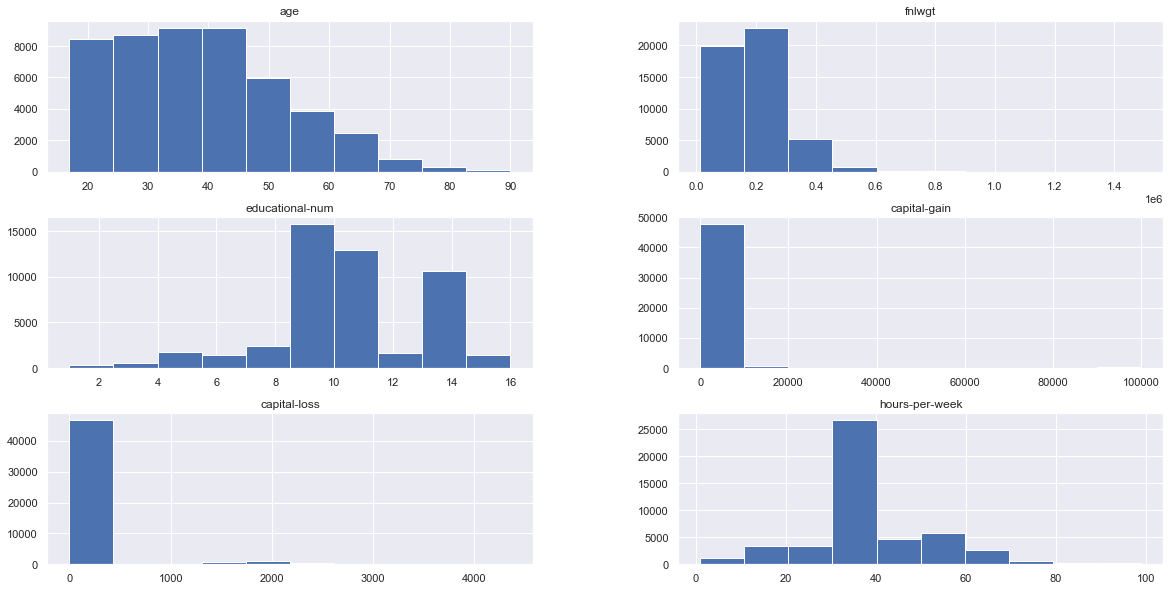

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from matplotlib import rcParams
rcParams['figure.figsize'] = 20,10
df.hist();

In [5]:
def remove_outliers(x):
    df1=pd.DataFrame()
    mean = np.mean(df.loc[:,x])
    std = np.std(df.loc[:,x])
    threshold_min = mean - 3*std
    threshold_max = mean + 3*std
    filters = (df.loc[:,x] > threshold_min) & (df.loc[:,x] < threshold_max)
    df1 = df[filters]
    return df1


In [6]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [7]:
df = remove_outliers('fnlwgt')
df = remove_outliers('capital-gain')
df = remove_outliers('capital-loss')
df = remove_outliers('hours-per-week')
df.shape

(45183, 15)

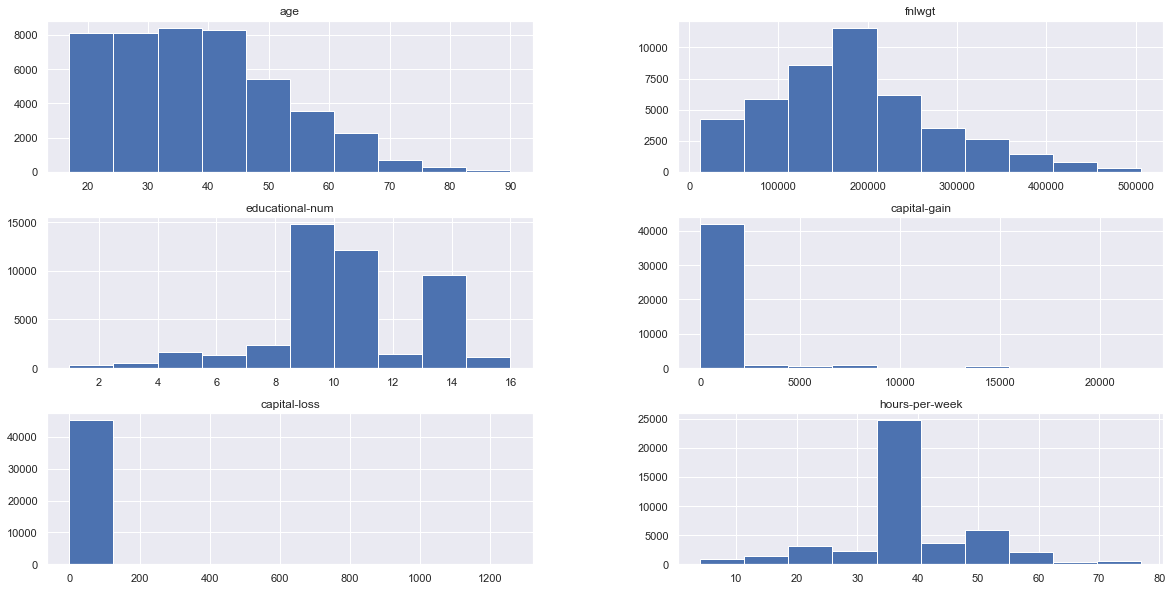

In [8]:
df.hist();

In [9]:
n_uniques=[]
colunas=[]
for i in df.columns:
    sizes = len(df.loc[:,i].unique())
    colunas.append(i)
    n_uniques.append(sizes)
df_unique = pd.DataFrame()
df_unique['colunas'] = colunas
df_unique['n_unique'] = n_uniques
df_unique = df_unique.sort_values(by='colunas',ascending=True)
list_unique =list(df_unique['n_unique'])
EDA = EDA_stats(df)
EDA['Amount_Unique'] = list_unique
EDA

,Amount_NaN,%_NaN,DType,Amount_Data,Mean,Median,Max,Min,STD,Amount_Unique
age,0,0.0,int64,45183,38.40,37.0,90,17,13.71,74
capital-gain,0,0.0,int64,45183,557.62,0.0,22040,0,2298.83,117
capital-loss,0,0.0,int64,45183,1.10,0.0,1258,0,31.58,13
education,0,0.0,object,45183,NaN,NaN,Some-college,10th,NaN,16
educational-num,0,0.0,int64,45183,10.02,10.0,16,1,2.54,16
fnlwgt,0,0.0,int64,45183,185277.38,177522.0,506436,12285,94836.96,27000
gender,0,0.0,object,45183,NaN,NaN,Male,Female,NaN,2
hours-per-week,0,0.0,int64,45183,39.80,40.0,77,4,11.20,73
income,0,0.0,object,45183,NaN,NaN,>50K,<=50K,NaN,2
marital-status,0,0.0,object,45183,NaN,NaN,Widowed,Divorced,NaN,7


In [10]:
df['income']=df['income'].replace({'>50K':1,'<=50K':0})

In [11]:
df0 = df[df.income == 0]
df1 = df[df.income == 1]
df0 = df0.sample(n=9947, replace=True)
df = pd.concat([df0, df1], ignore_index=True)
df.income.value_counts()

0    9947
1    9947
Name: income, dtype: int64

In [12]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.pipeline import Pipeline
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

from sklearn import metrics

list_accuracy = []
list_f1_score = []
list_auc=[]
list_scaler=[]
list_classifiers=[]
list_encoders=[]

encoders = [ce.BackwardDifferenceEncoder(),
                 ce.BaseNEncoder(),
                 ce.BinaryEncoder(),
                 ce.CatBoostEncoder(),
                 ce.GLMMEncoder(),
                 ce.HelmertEncoder(),
                 ce.JamesSteinEncoder(),
                 ce.LeaveOneOutEncoder(),
                 ce.MEstimateEncoder(),
                 ce.OneHotEncoder(),
                 ce.OrdinalEncoder(),
                 ce.SumEncoder(),
                 ce.PolynomialEncoder(),
                 ce.TargetEncoder(),
                ]
encoder=ce.CatBoostEncoder()
classifiers=[LogisticRegression(),KNeighborsClassifier(),GaussianNB(),DecisionTreeClassifier(),SVC()]

nome = ['Regressão_Logística','KNN','Naive_Bayes','Decision_Tree','SVM']

scalers = [MinMaxScaler(),StandardScaler(),RobustScaler(),QuantileTransformer(),MaxAbsScaler()]

results=pd.DataFrame()


for i in classifiers:
    for j in scalers:
        #for n in encoders:
        #encoder=n
        scaler=j
        clf = i
            
        numeric_features = [ 'age','capital-gain','capital-loss','educational-num','fnlwgt','hours-per-week']
        numeric_transformer = Pipeline(steps=[('scaler', j)])

        categorical_features = ['education','gender','marital-status','native-country','occupation','race','relationship','workclass']
        categorical_transformer = Pipeline(steps=[('encoder', encoder)])
            
        preprocessor = ColumnTransformer(
        transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

        clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', i)])
            
        X = df.drop('income', axis = 1)
        y = df['income']
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 23,test_size=0.25)
        clf.fit(X_train, y_train)         
            
        y_pred = clf.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        f1_score = metrics.f1_score(y_test,y_pred)
        auc = metrics.roc_auc_score(y_test, y_pred)
        list_accuracy.append(accuracy)
        list_f1_score.append(f1_score)
        list_auc.append(auc)
        list_scaler.append(j)
        list_classifiers.append(i)
        #list_encoders.append(n)

results['Classifier']=list_classifiers
results['Scaler'] = list_scaler
#results['Encoder'] = list_encoders
results['Accuracy']=list_accuracy
results['f1_score']=list_f1_score
results['AUC']=list_auc
results = results.sort_values(by='AUC',ascending=False)
results

,Classifier,Scaler,Accuracy,f1_score,AUC
21,SVC(),StandardScaler(),0.814636,0.827276,0.814006
20,SVC(),MinMaxScaler(),0.812827,0.826726,0.812128
5,KNeighborsClassifier(),MinMaxScaler(),0.812224,0.818429,0.811969
23,SVC(),QuantileTransformer(),0.812023,0.824677,0.811402
24,SVC(),MaxAbsScaler(),0.811620,0.825545,0.810926
7,KNeighborsClassifier(),RobustScaler(),0.811017,0.816335,0.810813
9,KNeighborsClassifier(),MaxAbsScaler(),0.809208,0.815835,0.808936
4,LogisticRegression(),MaxAbsScaler(),0.807600,0.817610,0.807145
0,LogisticRegression(),MinMaxScaler(),0.807398,0.817385,0.806946
1,LogisticRegression(),StandardScaler(),0.806594,0.816692,0.806138


In [13]:
from sklearn.model_selection import ParameterSampler
from scipy.stats import loguniform, uniform, randint

param_grid = {
    'classifier__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 1],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean','manhattan','shebyshev','minkowski']
}

from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, StratifiedKFold, RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=23)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)

numeric_features = [ 'age','capital-gain','capital-loss','educational-num','fnlwgt','hours-per-week']
numeric_transformer = Pipeline(steps=[('scaler', RobustScaler())])

categorical_features = ['education','gender','marital-status','native-country','occupation','race','relationship','workclass']
categorical_transformer = Pipeline(steps=[('encoder', ce.CatBoostEncoder())])
            
preprocessor = ColumnTransformer(
transformers=[
('num', numeric_transformer, numeric_features),
('cat', categorical_transformer, categorical_features)])

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', KNeighborsClassifier())])

random_search = RandomizedSearchCV(clf, param_grid, n_iter=10, cv=skf, scoring='roc_auc', verbose=1, random_state=23)

random_search.fit(X_train, y_train)

print(random_search.best_params_)
print('The best score for KNN is:',np.round(random_search.best_score_,5))



Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'classifier__weights': 'distance', 'classifier__n_neighbors': 9, 'classifier__metric': 'minkowski'}
The best score for KNN is: 0.90553


In [14]:
param_grid = {"classifier__criterion":["gini","entropy"],
             "classifier__splitter":["best","random"],
             "classifier__max_depth":range(1,50,2),
             "classifier__min_samples_leaf":range(1,15,1),
             "classifier__min_samples_split":range(2,20,1) 
            }

numeric_features = [ 'age','capital-gain','capital-loss','educational-num','fnlwgt','hours-per-week']
numeric_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])

categorical_features = ['education','gender','marital-status','native-country','occupation','race','relationship','workclass']
categorical_transformer = Pipeline(steps=[('encoder', ce.CatBoostEncoder())])
            
preprocessor = ColumnTransformer(
transformers=[
('num', numeric_transformer, numeric_features),
('cat', categorical_transformer, categorical_features)])


clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier())])

random_search = RandomizedSearchCV(clf, param_grid, n_iter=10, cv=skf, scoring='roc_auc', verbose=1, random_state=23)

random_search.fit(X_train, y_train)

print(random_search.best_params_)
print('The best score for DecisionTree is:',np.round(random_search.best_score_,5))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'classifier__splitter': 'random', 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 12, 'classifier__max_depth': 41, 'classifier__criterion': 'gini'}
The best score for DecisionTree is: 0.88918


In [15]:
param_grid = {"classifier__penalty":["l1", 'l2', 'elasticnet', 'none'],
             "classifier__C":[0.1,1,2,3,4,5,10,20,50,100]
            }

numeric_features = [ 'age','capital-gain','capital-loss','educational-num','fnlwgt','hours-per-week']
numeric_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])

categorical_features = ['education','gender','marital-status','native-country','occupation','race','relationship','workclass']
categorical_transformer = Pipeline(steps=[('encoder', ce.CatBoostEncoder())])
            
preprocessor = ColumnTransformer(
transformers=[
('num', numeric_transformer, numeric_features),
('cat', categorical_transformer, categorical_features)])


clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

random_search = RandomizedSearchCV(clf, param_grid, n_iter=10, cv=skf, scoring='roc_auc', verbose=1, random_state=23)

random_search.fit(X_train, y_train)

print(random_search.best_params_)
print('The best score for Logistic Regression is:',np.round(random_search.best_score_,5))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'classifier__penalty': 'none', 'classifier__C': 5}
The best score for Logistic Regression is: 0.90106


In [16]:
param_grid = {"classifier__kernel":['linear','poly','rbf','sigmoid'#,'precomputed'
                                   ],
             "classifier__C":[0.1,1,2,3,4,5,10,20,50,100],
            #"classifier__gamma":[0.01,0.1,1,2,3,4,5,10]
            }

numeric_features = [ 'age','capital-gain','capital-loss','educational-num','fnlwgt','hours-per-week']
numeric_transformer = Pipeline(steps=[('scaler', QuantileTransformer())])

categorical_features = ['education','gender','marital-status','native-country','occupation','race','relationship','workclass']
categorical_transformer = Pipeline(steps=[('encoder', ce.CatBoostEncoder())])
            
preprocessor = ColumnTransformer(
transformers=[
('num', numeric_transformer, numeric_features),
('cat', categorical_transformer, categorical_features)])

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC())])

random_search = RandomizedSearchCV(clf, param_grid, n_iter=10, cv=skf, scoring='roc_auc', verbose=1, random_state=23)

random_search.fit(X_train, y_train)

print(random_search.best_params_)
print('The best score for SupportVectorMachine is:',np.round(random_search.best_score_,5))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'classifier__kernel': 'poly', 'classifier__C': 50}
The best score for SupportVectorMachine is: 0.89404


### Melhor AUC dos classificadores: KNN

In [17]:
numeric_features = [ 'age','capital-gain','capital-loss','educational-num','fnlwgt','hours-per-week']
numeric_transformer = Pipeline(steps=[('scaler', RobustScaler())])

categorical_features = ['education','gender','marital-status','native-country','occupation','race','relationship','workclass']
categorical_transformer = Pipeline(steps=[('encoder', ce.CatBoostEncoder())])
            
preprocessor = ColumnTransformer(
transformers=[
('num', numeric_transformer, numeric_features),
('cat', categorical_transformer, categorical_features)])

best_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', KNeighborsClassifier(weights = 'distance', n_neighbors= 9, metric= 'minkowski'))])

best_clf.fit(X_train,y_train)
y_pred = best_clf.predict(X_test)
print('Accuracy:',metrics.accuracy_score(y_test, y_pred))
print('f1-score:',metrics.f1_score(y_test,y_pred))
print('ROC AUC:', metrics.roc_auc_score(y_test, y_pred))

Accuracy: 0.8262967430639324
f1-score: 0.8301886792452831
ROC AUC: 0.8261525051042162
